## Regresion lineal
Un ejemplo para entender la regresion lineal. Asumimos que el coste de un alquiler, o las ventas de un producto es una función lineal de la x, sea esta la superficie del piso o el dinero gastadoen publicidad en TV

````latex notation````
\begin{equation}
y_e=\alpha+\beta x
\\ \text{Donde x es la variable predicha (gasto en publicidad) e y la variable a predecir (ventas)}
\end{equation}



Como ejercicio vamos a comparar las ventas de un producto con su publicidad.
### Al lio
First, the libraries:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [4]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data_ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


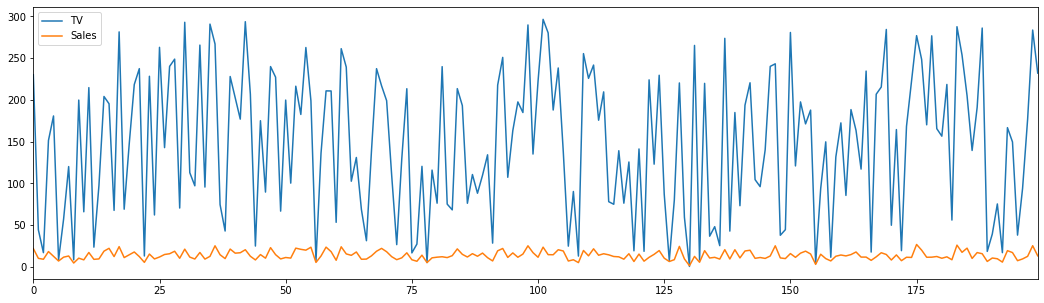

In [10]:
data_ads[["TV", "Sales"]].plot(figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AA1902A88>,
      dtype=object)

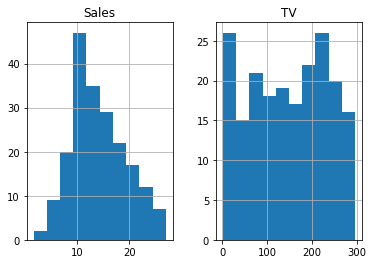

In [11]:
data_ads[["TV", "Sales"]].hist()

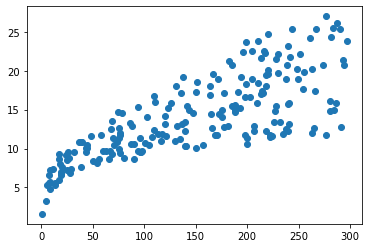

In [15]:
X = pd.DataFrame(data_ads["TV"])
y = pd.DataFrame(data_ads["Sales"])

plt.scatter(data_ads["TV"], data_ads["Sales"])

In [25]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

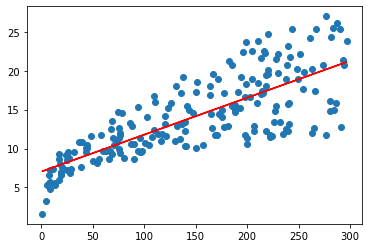

In [27]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [38]:
print ("Y = {}+{}*x".format(linear_regressor.intercept_, linear_regressor.coef_))

Y = [7.03259355]+[[0.04753664]]*x


### Si quisieramos evaluar la aproximación y ajustarla un poco mas:

In [45]:

# model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    linear_regressor.fit(X.iloc[train,:], y.iloc[train,:])
    score = linear_regressor.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    
print(scores)
print ("Y = {}+{}*x".format(linear_regressor.intercept_, linear_regressor.coef_))

[0.6363829113234338, 0.6390289925172856, 0.5065869312593468]
Y = [6.90318802]+[[0.04874071]]*x


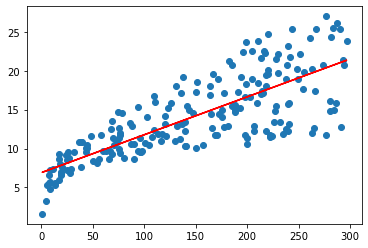

In [46]:
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Entendiendo la regresión lineal:

## Modelo de prueba
- con los datos históricos hemos sacado un modelo lineal. EL mas ajustado es:
\begin{equation}
Y_e=6.903+0.048 x
\\ \text{Donde x es la variable predicha (gasto en publicidad) e y la variable a predecir (ventas)}
\end{equation}
- Usando esta ecuación podemos predecir las ventas para una inversión cualquiera en publicidad

## Cálculo de los coeficientes con la técnica de los mínimos cuadrados.
- definimos el error como la diferencia entre el estimado y el real
\begin{equation}
e_i=(y_i-Y_e(x_i))
\end{equation}
- El objetivo es minimizar el error: minimizamos la suma de los errores al cuadrado sobre todos los puntos del dataset:
\begin{equation}
min\sum_{i=1}e_i^2=\sum_{i=1}(y_i-Y_e(x_i))^2=\sum_{i=1}(y_i-(\alpha+\beta x_i))^2
\end{equation}
- Utilizando cálculo diferencial se llega a: 
\begin{equation}
\beta=\frac{\sum_{i=1}(x_i-X)(y_1-Y)}{\sum_{i=1}(x_i-X)^2}=\frac{Cov(x,y)}{Var(x)}
\\\alpha=Y-\beta X
\end{equation}
- El resíduo de la aproximación lineal va a seguir una distribución normal
